In [14]:
%matplotlib inline



Object Detection From TF2 Saved Model
=====================================


In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import tensorflow as tf
import glob

tf.get_logger().setLevel('ERROR')           # Suppress TensorFlow logging (2)

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

IMAGE_PATHS = glob.glob("/root/userData/testImg/" + '/*.jpg')
print(IMAGE_PATHS)
print("done")

['/root/userData/testImg/Med_4_20201211173645.jpg', '/root/userData/testImg/Med_4_20201211173552.jpg', '/root/userData/testImg/Med_4_20201211173646.jpg', '/root/userData/testImg/Med_4_20201211173648.jpg', '/root/userData/testImg/Med_4_20201211173601.jpg', '/root/userData/testImg/Med_4_20201211173639.jpg', '/root/userData/testImg/Med_4_20201211173559.jpg', '/root/userData/testImg/Med_4_20201211173554.jpg']
done


In [16]:
PATH_TO_LABELS = "/root/userData/img/20201211_4MED_60P.pbtxt"

In [17]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = "/root/userData/frozeModel/20201211_4MED_60P" + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 15.794256687164307 seconds


In [18]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)
print("loadDone")

loadDone


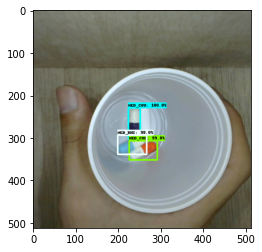

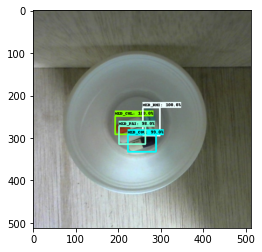

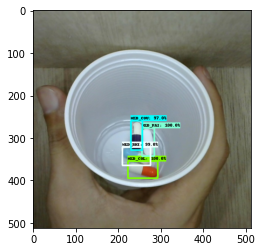

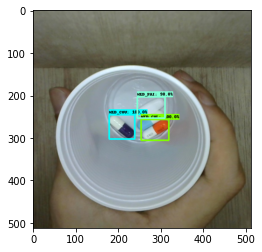

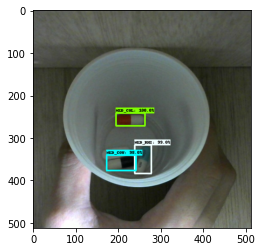

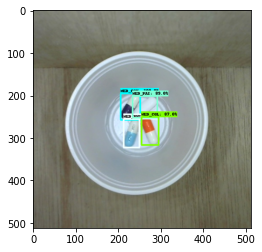

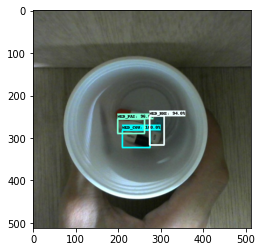

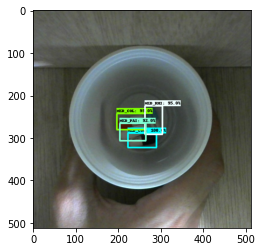

In [19]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:


    image_np = load_image_into_numpy_array(image_path)


    input_tensor = tf.convert_to_tensor(image_np)
    input_tensor = input_tensor[tf.newaxis, ...]

    detections = detect_fn(input_tensor)

    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=50,
          min_score_thresh=.80,
          agnostic_mode=False)
    imgName=image_path.split("/")[-1]
    saveImgFile=image_np_with_detections.copy()
    saveImgFile=cv2.cvtColor(saveImgFile,cv2.COLOR_RGB2BGR)
    cv2.imwrite("/root/userData/saveImg/"+imgName,saveImgFile)
    plt.figure()
    plt.imshow(image_np_with_detections)
#     print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2